In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.datasets import make_regression

from experiments2.auxiliary.auxiliary import construct_by_kmeans
from pgmpy.estimators import K2Score
from bamt.networks.discrete_bn import DiscreteBN
from bamt.networks.continuous_bn import ContinuousBN
from bamt.networks.hybrid_bn import HybridBN
from bamt_inherited.networks.discrete import DiscreteBNGI

from tqdm import tqdm
imagespath = 'error_gradation_images'

In [10]:
data = pd.read_csv("../../datasets/abalone.data", sep=',',
                   names=['sex', 'length', 'diameter', 'height', 'W_weight', 'S_weight', 'viscera_weight',
                          'shell_weight', 'rings'])
data = data[data["sex"] != "I"]
data["sex"] = data["sex"].replace({"F": 1, "M": 0})
data = data.reset_index().drop(columns=["index"])
n_features = data.shape[1] - 1
n = data.shape[0]
target = "sex"
features = data.columns.difference([target]).tolist()
data = data[data["height"] < 0.26]
data.head(10)

,sex,length,diameter,height,W_weight,S_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
5,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
6,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
7,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
8,1,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14
9,0,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


In [11]:
model = GradientBoostingClassifier(n_estimators=60)
#model = LinearRegression()

model.fit(data[features], data[target])

GradientBoostingClassifier(n_estimators=60)

In [12]:
import shap

In [13]:
explainer = shap.Explainer(model)

In [14]:
shap_values = explainer(data[features])

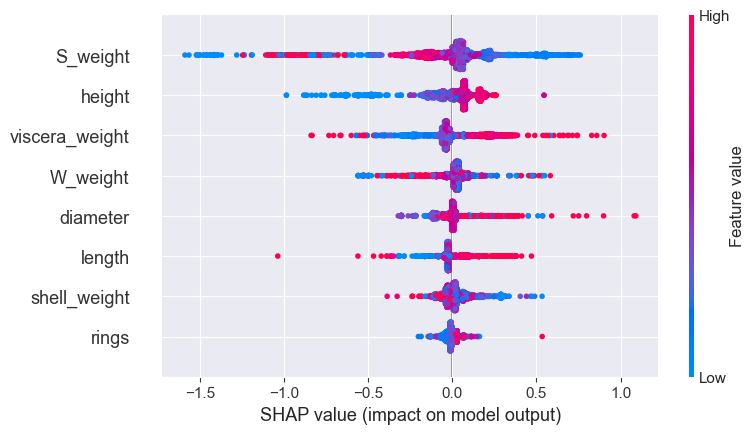

In [15]:
shap.plots.beeswarm(shap_values)

<AxesSubplot: >

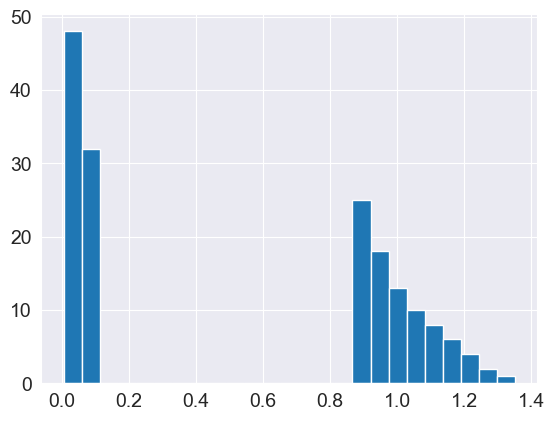

In [23]:
data[shap_values.values[:, 0]<-0.5]['S_weight'].hist(bins=25)

In [18]:
shap_values.values.shape

(2833, 8)

In [8]:
shap_values

.values =
array([[ 1.31246553e-01,  6.25198028e-02, -1.09896181e-01, ...,
         6.53972094e-02,  7.57558958e-02, -3.87753979e-01],
       [-9.13247698e-02, -6.23386514e-03, -7.25289880e-02, ...,
         1.49639005e-03,  1.51954866e-01, -1.62039202e-01],
       [ 8.04134076e-02,  2.28183876e-02, -8.40348382e-03, ...,
        -2.79812607e-02,  1.58204452e-01, -2.87142277e-02],
       ...,
       [ 2.95778297e-03, -8.92947030e-02, -8.47254891e-03, ...,
        -3.02252495e-02,  7.31830586e-03, -3.35505152e-02],
       [ 1.69320895e-02,  4.33146317e-02, -8.48161890e-03, ...,
         2.79833220e-04,  5.26218353e-02, -3.63421420e-02],
       [-9.58640559e-01, -1.64508562e-01,  9.42195927e-02, ...,
         6.21730566e-02, -1.32210155e-01,  6.24192693e-03]])

.base_values =
array([-0.17252539, -0.17252539, -0.17252539, ..., -0.17252539,
       -0.17252539, -0.17252539])

.data =
array([[ 0.2245,  0.514 ,  0.365 , ..., 15.    ,  0.15  ,  0.101 ],
       [ 0.0995,  0.2255,  0.265 , ...,  7

<AxesSubplot: >

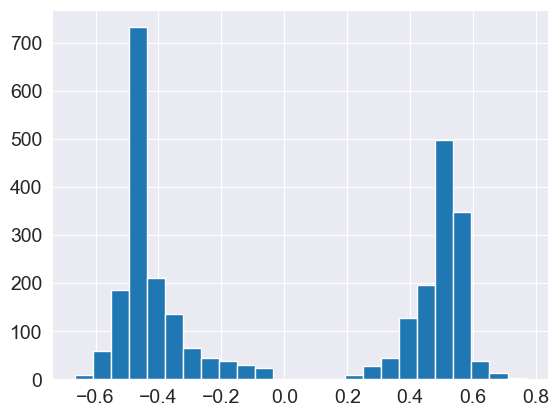

In [26]:
(data[target]-model.predict_proba(data[features])[:, 1]).hist(bins=25)